In [1]:
import pandas as pd
import numpy as np

# 数据集

数据样本包括训练样本和测试样本。

其中，训练样本共有1648881条记录，是用户在2016年1月1日至2016年6月30日之间的真实线下消费行为信息。

测试样本为用户在2016年7月领取商户优惠券信息，其中不包含消费日期。

总的数据属性包含用户ID、商品ID、优惠券ID、用户距门店距离、领取优惠券日期、消费日期等6个属性。


In [2]:
# 读取训练样本和测试样本
data_train = pd.read_csv("D:/datasets/商务数据分析/7/data/train.csv")
data_test = pd.read_csv("D:/datasets/商务数据分析/7/data/test.csv")

# 目标

本案例的目标是预测用户在领取优惠券15天以内的使用情况。

为了将该问题转化为二分类问题，将领取优惠券后15天以内使用的样本标记为正类样本，15天以内没使用的样本标记为负样本。

确定此案例的问题是分类问题后，然后结合用户使用优惠券的情景和实际业务场景，主要需要建立用户指标和商户指标。

使用这两个指标衡量用户使用优惠券的情况。最后根据这些指标建立分类模型，预测用户在领取优惠券15天以内的使用情况。


#  探索性分析

原始数据集中包括用户ID、商户ID、优惠券ID、优惠率、用户经常活动的地点与商家最近的门店距离等信息，需要对原始数据从多个维度进行探索性分析，本案例主要包括数据描述性统计分析、分析用户消费行为信息、分析商户投放优惠券信息等，了解用户的消费行为及商户投放优惠券的情况。


描述性统计分析。

对训练样本、测试样本进行描述性统计分析，分别得到训练和测试样本的属性观测值中的空值个数、最大值和最小值。




### 训练样本的描述性统计分析

In [3]:

explore_train =data_train.describe(percentiles=[],include="all").T # percentiles参数是指定计算多少的分位数表（如1/4分位数、中位数等）

In [4]:
explore_train 

,count,unique,top,freq,mean,std,min,50%,max
user_id,1648881.0,NaN,NaN,NaN,3688954.810486,2123594.842488,4.0,3694837.0,7361032.0
merchant_id,1648881.0,NaN,NaN,NaN,4040.951813,2438.159893,1.0,3532.0,8856.0
coupon_id,947279.0,NaN,NaN,NaN,6811.363212,4155.866533,1.0,7430.0,14045.0
discount_rate,947279,45,30:5,250742,NaN,NaN,NaN,NaN,NaN
distance,1648881.0,NaN,NaN,NaN,2.361636,3.483974,0.0,0.0,10.0
date_received,947279.0,NaN,NaN,NaN,20160314.145041,176.963561,20160101.0,20160321.0,20160615.0
date,768767.0,NaN,NaN,NaN,20160398.685118,162.081545,20160101.0,20160416.0,20160630.0


In [5]:
explore_train['null']=data_train.isnull().sum()

In [6]:
explore_train

,count,unique,top,freq,mean,std,min,50%,max,null
user_id,1648881.0,NaN,NaN,NaN,3688954.810486,2123594.842488,4.0,3694837.0,7361032.0,0
merchant_id,1648881.0,NaN,NaN,NaN,4040.951813,2438.159893,1.0,3532.0,8856.0,0
coupon_id,947279.0,NaN,NaN,NaN,6811.363212,4155.866533,1.0,7430.0,14045.0,701602
discount_rate,947279,45,30:5,250742,NaN,NaN,NaN,NaN,NaN,701602
distance,1648881.0,NaN,NaN,NaN,2.361636,3.483974,0.0,0.0,10.0,0
date_received,947279.0,NaN,NaN,NaN,20160314.145041,176.963561,20160101.0,20160321.0,20160615.0,701602
date,768767.0,NaN,NaN,NaN,20160398.685118,162.081545,20160101.0,20160416.0,20160630.0,880114


In [7]:
explore_train=explore_train[['null', 'max', 'min']]

In [8]:
explore_train.columns = ['空值数', '最大值', '最小值']

In [9]:
explore_train

,空值数,最大值,最小值
user_id,0,7361032.0,4.0
merchant_id,0,8856.0,1.0
coupon_id,701602,14045.0,1.0
discount_rate,701602,NaN,NaN
distance,0,10.0,0.0
date_received,701602,20160615.0,20160101.0
date,880114,20160630.0,20160101.0


###  测试样本的描述性统计分析

In [10]:

explore_test = data_test.describe(percentiles = [], include = 'all').T 
explore_test['null'] = data_test.isnull().sum()  # 统计缺失值
explore_test = explore_test[['null', 'max', 'min']]
explore_test.columns = ['空值数', '最大值', '最小值']  # 表头重命名

In [11]:
explore_test

,空值数,最大值,最小值
user_id,0,7361024.0,209.0
merchant_id,0,8856.0,6.0
coupon_id,0,14045.0,3.0
discount_rate,0,NaN,NaN
distance,0,10.0,0.0
date_received,0,20160731.0,20160701.0


### 导出描述性统计分析结果

In [12]:

explore_train.to_csv("D:/datasets/商务数据分析/7/data/train_result.csv") 
explore_test.to_csv("D:/datasets/商务数据分析/7/data/result_test.csv")



### 分析用户消费行为信息。



#### 数据格式转化

In [13]:
data_train

,user_id,merchant_id,coupon_id,discount_rate,distance,date_received,date
0,1439408,2632,NaN,NaN,0,NaN,20160217.0
1,1439408,4663,11002.0,150:20,1,20160528.0,NaN
2,1439408,2632,8591.0,20:1,0,20160217.0,NaN
3,1439408,2632,1078.0,20:1,0,20160319.0,NaN
4,1439408,2632,8591.0,20:1,0,20160613.0,NaN
...,...,...,...,...,...,...,...
1648876,212662,3532,NaN,NaN,1,NaN,20160322.0
1648877,212662,3021,3739.0,30:1,6,20160508.0,20160602.0
1648878,212662,2934,NaN,NaN,2,NaN,20160321.0
1648879,752472,7113,1633.0,50:10,6,20160613.0,NaN


In [14]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648881 entries, 0 to 1648880
Data columns (total 7 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   user_id        1648881 non-null  int64  
 1   merchant_id    1648881 non-null  int64  
 2   coupon_id      947279 non-null   float64
 3   discount_rate  947279 non-null   object 
 4   distance       1648881 non-null  int64  
 5   date_received  947279 non-null   float64
 6   date           768767 non-null   float64
dtypes: float64(3), int64(3), object(1)
memory usage: 88.1+ MB


In [15]:
data1=data_train.copy()

In [16]:
data1['date'] = data1['date'].astype('str').apply(lambda x:x.split('.')[0])

In [17]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648881 entries, 0 to 1648880
Data columns (total 7 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   user_id        1648881 non-null  int64  
 1   merchant_id    1648881 non-null  int64  
 2   coupon_id      947279 non-null   float64
 3   discount_rate  947279 non-null   object 
 4   distance       1648881 non-null  int64  
 5   date_received  947279 non-null   float64
 6   date           1648881 non-null  object 
dtypes: float64(2), int64(3), object(2)
memory usage: 88.1+ MB


In [18]:
data1

,user_id,merchant_id,coupon_id,discount_rate,distance,date_received,date
0,1439408,2632,NaN,NaN,0,NaN,20160217
1,1439408,4663,11002.0,150:20,1,20160528.0,nan
2,1439408,2632,8591.0,20:1,0,20160217.0,nan
3,1439408,2632,1078.0,20:1,0,20160319.0,nan
4,1439408,2632,8591.0,20:1,0,20160613.0,nan
...,...,...,...,...,...,...,...
1648876,212662,3532,NaN,NaN,1,NaN,20160322
1648877,212662,3021,3739.0,30:1,6,20160508.0,20160602
1648878,212662,2934,NaN,NaN,2,NaN,20160321
1648879,752472,7113,1633.0,50:10,6,20160613.0,nan


In [19]:
data1['date'] = pd.to_datetime(data1['date'])  # 将date转为datetime类型

In [20]:
data1

,user_id,merchant_id,coupon_id,discount_rate,distance,date_received,date
0,1439408,2632,NaN,NaN,0,NaN,2016-02-17
1,1439408,4663,11002.0,150:20,1,20160528.0,NaT
2,1439408,2632,8591.0,20:1,0,20160217.0,NaT
3,1439408,2632,1078.0,20:1,0,20160319.0,NaT
4,1439408,2632,8591.0,20:1,0,20160613.0,NaT
...,...,...,...,...,...,...,...
1648876,212662,3532,NaN,NaN,1,NaN,2016-03-22
1648877,212662,3021,3739.0,30:1,6,20160508.0,2016-06-02
1648878,212662,2934,NaN,NaN,2,NaN,2016-03-21
1648879,752472,7113,1633.0,50:10,6,20160613.0,NaT


In [21]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648881 entries, 0 to 1648880
Data columns (total 7 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   user_id        1648881 non-null  int64         
 1   merchant_id    1648881 non-null  int64         
 2   coupon_id      947279 non-null   float64       
 3   discount_rate  947279 non-null   object        
 4   distance       1648881 non-null  int64         
 5   date_received  947279 non-null   float64       
 6   date           768767 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 88.1+ MB


In [22]:
# 提取月份
data_month = data1['date'].apply(lambda x : x.month)  

In [23]:
data_month

0          2.0
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
1648876    3.0
1648877    6.0
1648878    3.0
1648879    NaN
1648880    NaN
Name: date, Length: 1648881, dtype: float64

In [24]:
data_count = data_month.value_counts().sort_index(ascending=True)

In [25]:
# 对各月份用户消费次数进行统计
data_count

1.0     96789
2.0     78031
3.0    146298
4.0    129135
5.0    182776
6.0    135738
Name: date, dtype: int64

Text(0.5, 1.0, '2016年各月用户消费次数')

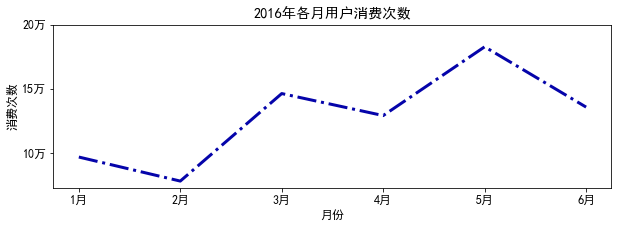

In [26]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 3))  # 设置画布大小
plt.rcParams['font.sans-serif'] = 'SimHei'  # 设置中文显示
plt.rcParams['axes.unicode_minus'] = False  #负号
plt.rc('font', size=12)
plt.plot(data_count.index, data_count, color='#0504aa',
         linewidth=3.0, linestyle='-.')
plt.xlabel('月份')
plt.ylabel('消费次数')
plt.xticks([1,2,3,4,5,6],["1月","2月","3月","4月","5月","6月"])
plt.yticks([100000,150000,200000],["10万","15万","20万"])
plt.title('2016年各月用户消费次数')

array([<AxesSubplot:ylabel='date'>], dtype=object)

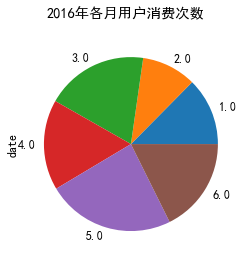

In [27]:
pd.DataFrame(data_count).plot(kind="pie",subplots=True,legend=False,title="2016年各月用户消费次数")

In [28]:
data1

,user_id,merchant_id,coupon_id,discount_rate,distance,date_received,date
0,1439408,2632,NaN,NaN,0,NaN,2016-02-17
1,1439408,4663,11002.0,150:20,1,20160528.0,NaT
2,1439408,2632,8591.0,20:1,0,20160217.0,NaT
3,1439408,2632,1078.0,20:1,0,20160319.0,NaT
4,1439408,2632,8591.0,20:1,0,20160613.0,NaT
...,...,...,...,...,...,...,...
1648876,212662,3532,NaN,NaN,1,NaN,2016-03-22
1648877,212662,3021,3739.0,30:1,6,20160508.0,2016-06-02
1648878,212662,2934,NaN,NaN,2,NaN,2016-03-21
1648879,752472,7113,1633.0,50:10,6,20160613.0,NaT


In [29]:
#处理data_received字段
data1['date_received'] = data1['date_received'].astype('str').apply(lambda x:x.split('.')[0])
data1['date_received'] = pd.to_datetime(data1['date_received']) 

In [30]:
data1

,user_id,merchant_id,coupon_id,discount_rate,distance,date_received,date
0,1439408,2632,NaN,NaN,0,NaT,2016-02-17
1,1439408,4663,11002.0,150:20,1,2016-05-28,NaT
2,1439408,2632,8591.0,20:1,0,2016-02-17,NaT
3,1439408,2632,1078.0,20:1,0,2016-03-19,NaT
4,1439408,2632,8591.0,20:1,0,2016-06-13,NaT
...,...,...,...,...,...,...,...
1648876,212662,3532,NaN,NaN,1,NaT,2016-03-22
1648877,212662,3021,3739.0,30:1,6,2016-05-08,2016-06-02
1648878,212662,2934,NaN,NaN,2,NaT,2016-03-21
1648879,752472,7113,1633.0,50:10,6,2016-06-13,NaT


In [31]:
# 提取领券日期的月份
received_month = data1['date_received'].apply(lambda x :x.month)
month_count = received_month.value_counts().sort_index(ascending=True)

In [32]:
month_count

1.0    339266
2.0    118699
3.0     93010
4.0    126168
5.0    188325
6.0     81811
Name: date_received, dtype: int64

<AxesSubplot:title={'center':'用户领券次数'}>

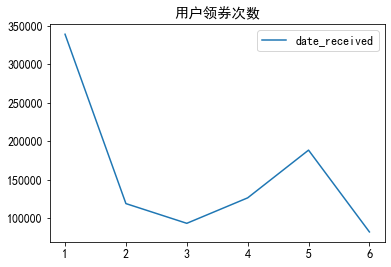

In [33]:
pd.DataFrame(month_count).plot(kind="line",title="用户领券次数")

<AxesSubplot:title={'center':'用户领券次数'}>

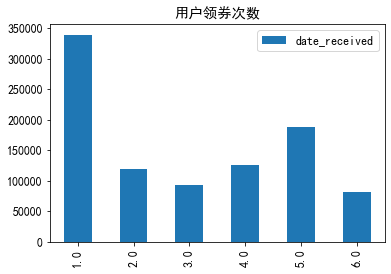

In [34]:
pd.DataFrame(month_count).plot(kind="bar",title="用户领券次数")

array([<AxesSubplot:ylabel='月'>], dtype=object)

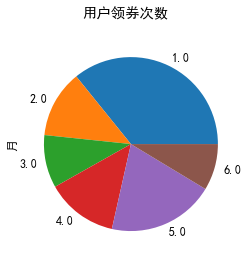

In [35]:
pd.DataFrame(month_count).plot(kind="pie",subplots=True,legend=False,ylabel="月",title="用户领券次数")

In [36]:
data1[data1['date'].notnull()&data1['coupon_id'].notnull()]

,user_id,merchant_id,coupon_id,discount_rate,distance,date_received,date
6,1439408,2632,8591.0,20:1,0,2016-05-16,2016-06-13
30,1113008,1361,11166.0,20:1,0,2016-05-15,2016-05-21
35,2881376,8390,7531.0,20:5,0,2016-03-21,2016-03-29
64,114747,6901,2366.0,30:5,0,2016-05-23,2016-06-05
70,114747,5341,111.0,30:5,0,2016-01-27,2016-02-21
...,...,...,...,...,...,...,...
1648833,1437872,7706,416.0,100:10,4,2016-01-29,2016-02-02
1648870,212662,2934,5686.0,30:5,2,2016-03-21,2016-03-30
1648874,212662,3021,3739.0,30:1,6,2016-05-04,2016-05-08
1648875,212662,2934,5686.0,30:5,2,2016-03-21,2016-03-22


In [37]:
# 获取领券消费数据
cop_distance = data1[data1['date'].notnull()&data1[
        'coupon_id'].notnull()][['user_id','distance','date','discount_rate']]

In [38]:
cop_distance

,user_id,distance,date,discount_rate
6,1439408,0,2016-06-13,20:1
30,1113008,0,2016-05-21,20:1
35,2881376,0,2016-03-29,20:5
64,114747,0,2016-06-05,30:5
70,114747,0,2016-02-21,30:5
...,...,...,...,...
1648833,1437872,4,2016-02-02,100:10
1648870,212662,2,2016-03-30,30:5
1648874,212662,6,2016-05-08,30:1
1648875,212662,2,2016-03-22,30:5


In [39]:
# 统计1~7月领券消费次数
date_month = cop_distance['date'].apply(lambda x :x.month)


In [40]:
date_month

6          6
30         5
35         3
64         6
70         2
          ..
1648833    2
1648870    3
1648874    5
1648875    3
1648877    6
Name: date, Length: 67165, dtype: int64

In [41]:
datemonth_count = date_month.value_counts().sort_index(ascending=True)

In [42]:
datemonth_countlist = list(datemonth_count)  # 转为列表
#datemonth_countlist.append(0)  # 列表末尾追加一个数字0

In [43]:
datemonth_countlist

[4992, 12271, 11253, 7964, 17980, 12705]

In [44]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 5))  # 设置画布大小 
name_list = [i for i in range(1,7)]


<Figure size 576x360 with 0 Axes>

Text(0.5, 1.0, '2016年各月用户领券次数与领券消费次数')

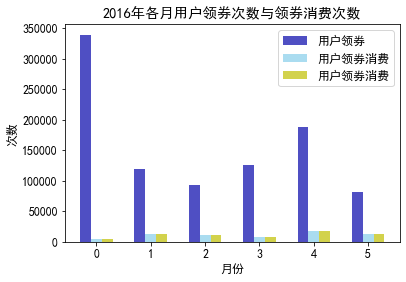

In [45]:
x=[i for i in range(len(datemonth_count))]
width = 0.2; alpha = 0.7 # width设置宽度大小,alpha为透明度
for i in range(len(x)):
    x[i] = x[i]-width

plt.bar(x,height = list(month_count),
        width = width,label='用户领券',alpha=alpha, color='#0504aa')
for i in range(len(x)):
    x[i] = x[i] + width
#width=0.3
plt.bar(x,height = datemonth_countlist,
        width = width,label='用户领券消费',alpha=alpha, color='skyblue') 
for i in range(len(x)):
    x[i] = x[i] + width
#widthth=0.1
plt.bar(x,height = datemonth_countlist,
        width = width,label='用户领券消费',alpha=alpha, color='y') 
plt.legend()  # 图例
plt.xlabel('月份')
plt.ylabel('次数')
plt.title('2016年各月用户领券次数与领券消费次数')

分析商户投放优惠券信息。

In [46]:
# 提取商户发放优惠券数据 
coupon_data = data1.loc[data1['coupon_id'].notnull(),['merchant_id','coupon_id']]


In [47]:
coupon_data

,merchant_id,coupon_id
1,4663,11002.0
2,2632,8591.0
3,2632,1078.0
4,2632,8591.0
6,2632,8591.0
...,...,...
1648874,3021,3739.0
1648875,2934,5686.0
1648877,3021,3739.0
1648879,7113,1633.0


In [48]:
merchant_count = coupon_data['merchant_id'].value_counts()

In [49]:
merchant_count

3381    117818
450      60092
760      43182
5341     34135
2709     33535
         ...  
1341         1
5874         1
6462         1
4339         1
5240         1
Name: merchant_id, Length: 5363, dtype: int64

In [50]:
print('参与投放优惠券商户总数为：',merchant_count.shape[0])
print('商户最多发放优惠券{max_count}张\n商户最少发放优惠券{min_count}张'.
      format(max_count=merchant_count.max(), min_count=merchant_count.min()))

参与投放优惠券商户总数为： 5363
商户最多发放优惠券117818张
商户最少发放优惠券1张


In [51]:
merchant_count[:10].values

array([117818,  60092,  43182,  34135,  33535,  30887,  26329,  23709,
        19358,  19235], dtype=int64)

Text(0.5, 1.0, '投放优惠券数量前10名商户ID')

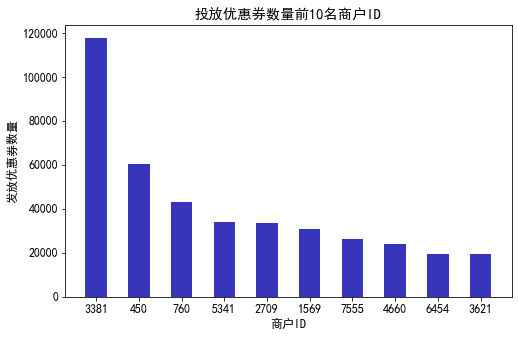

In [52]:
# 绘制直方图分析商家投放数量
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 5))  # 设置画布大小
plt.rc('font', size=12)
plt.bar([i for i in range(10)],
        height=merchant_count[:10].values, width=0.5,
        alpha=0.8, color='#0504aa')
plt.xticks(range(len(merchant_count[:10])), merchant_count[:10].index)
plt.xlabel('商户ID')
plt.ylabel('发放优惠券数量')
plt.title('投放优惠券数量前10名商户ID')

In [53]:
use_data = data1.loc[data1['coupon_id'].notnull()&data1['date'].notnull(),['merchant_id','coupon_id']]


In [54]:
use_count=use_data["merchant_id"].value_counts()

In [55]:
merchant_count

3381    117818
450      60092
760      43182
5341     34135
2709     33535
         ...  
1341         1
5874         1
6462         1
4339         1
5240         1
Name: merchant_id, Length: 5363, dtype: int64

In [56]:
use_count

5341    5522
760     2984
6485    2876
3381    2388
2099    1660
        ... 
6438       1
4263       1
5926       1
5798       1
2113       1
Name: merchant_id, Length: 3738, dtype: int64

In [57]:
u_m_count=pd.merge(merchant_count,use_count,left_on=merchant_count.index,right_on=use_count.index)

In [58]:
u_m_count.iloc[:20,0].astype("str").values

array(['3381', '450', '760', '5341', '2709', '1569', '7555', '4660',
       '6454', '3621', '1433', '2099', '6434', '6901', '1469', '7019',
       '4860', '6485', '5717', '4663'], dtype=object)

<AxesSubplot:xlabel='商户ID', ylabel='券数量'>

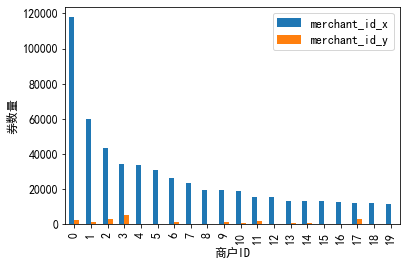

In [59]:
u_m_count.iloc[:20,1:].plot(kind="bar",xlabel="商户ID",
                           ylabel="券数量",width=0.6)

Text(0.5, 1.0, '2016年各月用户领券次数与领券消费次数')

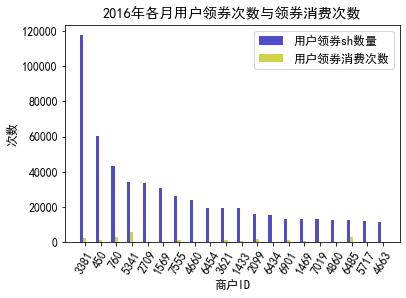

In [60]:
x=[i for i in range(20)]
width = 0.2; alpha = 0.7 # width设置宽度大小,alpha为透明度
for i in range(len(x)):
    x[i] = x[i]-width
plt.bar(x,height = list(u_m_count.iloc[:20,1]),
        width = width,label='用户领券sh数量',alpha=alpha, color='#0504aa')
for i in range(len(x)):
    x[i] = x[i] + width
#width=0.3
plt.bar(x,height =list(u_m_count.iloc[:20,2]),
        width = width,label='用户领券消费次数',alpha=alpha, color='y') 
plt.legend()  # 图例
plt.xlabel('商户ID')
plt.ylabel('次数')
plt.xticks(ticks=[i for i in range(20)], labels=u_m_count.iloc[:20,0],rotation=60)
plt.title('2016年各月用户领券次数与领券消费次数')

In [61]:
u_m_count["比例"]=u_m_count.iloc[:,2]/u_m_count.iloc[:,1]

In [62]:
umd=u_m_count.sort_values(by="比例",ascending=False)

In [63]:
umd[umd["merchant_id_x"]>1000]

,key_0,merchant_id_x,merchant_id_y,比例
45,4142,3383,1360,0.402010
65,7910,1717,643,0.374490
75,7903,1390,495,0.356115
72,6135,1483,489,0.329737
80,6683,1243,407,0.327434
...,...,...,...,...
54,4909,2339,5,0.002138
37,8077,5227,11,0.002104
29,6424,7456,13,0.001744
43,2046,3463,6,0.001733


In [64]:
# 提取用户消费次数数据
date_distance = data1.loc[data1['date'].notnull()&data1[
        'distance'].notnull(),['user_id','distance','date']]
print('数据形状:', date_distance.shape)

数据形状: (768767, 3)


In [65]:
# 统计用户消费次数
dis_count = date_distance['distance'].value_counts()

In [66]:
dis_count

0     524743
1      91952
2      40619
10     36231
3      23515
4      15830
5      11273
6       8428
7       6429
8       5417
9       4330
Name: distance, dtype: int64

Text(0.5, 1.0, '用户到门店消费的距离比例')

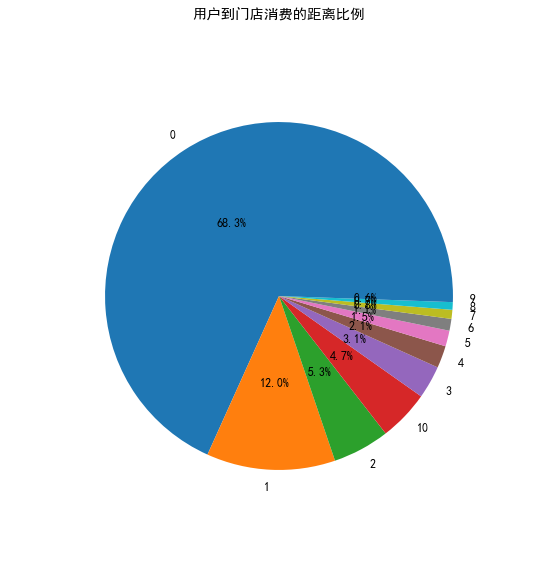

In [67]:
# 绘制用户到门店消费的距离比例饼图
fig = plt.figure(figsize=(10, 10))  # 设置画布大小
plt.pie(x=dis_count, labels=dis_count.index,
        pctdistance=.5,autopct='%1.1f%%', radius=0.8)
# pctdistance是数据标签的距离圆心位置
plt.title('用户到门店消费的距离比例')

In [68]:
# 提取用户领券到店铺消费距离数据
cop_distance = data1.loc[data1['date'].notnull()&data1[
        'distance'].notnull()&data1['coupon_id'].notnull(),[
                'user_id', 'distance', 'date', 'discount_rate']]
print('数据形状:', cop_distance.shape) 


数据形状: (67165, 4)


In [69]:
cop_count = cop_distance['distance'].value_counts()

In [70]:
# 提取用户未用券到店铺消费距离数据
nocop_distance = data1.loc[data1['date'].notnull()&data1[
        'distance'].notnull()&data1['coupon_id'].isnull(),[
                'user_id', 'distance', 'date', 'discount_rate']]
print('数据形状:', nocop_distance.shape)
nocop_count = nocop_distance['distance'].value_counts()

数据形状: (701602, 4)


Text(0.5, 1.0, '用户没用券直接到门店消费的距离比例')

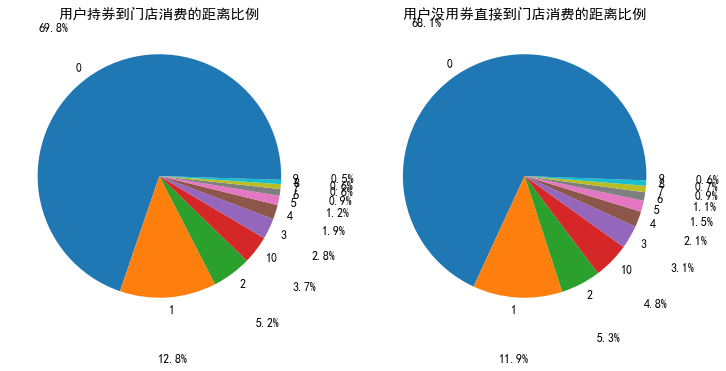

In [71]:
# 绘制用户持券到门店消费的距离比例饼图比例饼图
plt.figure(figsize=(12,6))  # 设置画布大小
#fig = plt.figure(figsize=(5, 6))  
plt.subplot(1,2,1)  # 子图
plt.pie(x=cop_count, labels=cop_count.index, pctdistance=1.5,
       autopct='%1.1f%%')
# pctdistance是数据标签的距离圆心位置

plt.title('用户持券到门店消费的距离比例')

# 绘制用户未持券直接到门店消费的距离比例饼图
plt.subplot(1,2,2)
plt.pie(x=nocop_count, labels=nocop_count.index, pctdistance=1.5,
       autopct='%1.1f%%')
plt.title('用户没用券直接到门店消费的距离比例')

## 结论

ID为3381的商户发放数量高达117818张，其次是ID为760和450的商户，其他商户投放优惠券数量都低于45000，说明大部分商户的优惠券发放数量在45000以内，只有少部分商户超过45000。

大部分用户更偏向近距离消费，其中消费距离不足500m的用户占到所有用户中的68.3%，但出现4.7%的用户却选择大于等于5km外门店进行消费，可以看出这部分用户对该品牌门店的消费依赖性。

两个饼图的分布情况类似，无论是否持券消费，大部分用户都偏向去近距离的门店消费。而只有少部分用户愿意选择去5km外的门店进行消费，说明这些用户对门店有一定的依赖性。


# 数据预处理

In [72]:
# 数据清洗后数据表
cleanfile_train = 'clean_train.csv'  
cleanfile_test = 'clean_test.csv'

In [73]:
# 训练样本和测试样本进行合并，方便数据清洗
data = pd.concat([data_train, data_test], axis=0, join='outer')

In [74]:
# 对整个dataframe的空值进行处理
# 原数据中缺失值为"null"字符串,设置为 numpy.nan
data.iloc[:, :5] = data.iloc[:, :5].applymap(
        lambda x:np.nan if x == 'null' else x)

# 对日期类型的空值设置为 None（方便后面整列转成时间类型）
data.iloc[:, 5:] = data.iloc[:, 5:].applymap(
        lambda x: None if x == 'null' else x)

In [75]:
# 处理data_received字段
data['date_received'] = data['date_received'].astype('str').apply(
        lambda x:x.split('.')[0])
# 转为datetime格式
data['date_received'] = pd.to_datetime(data['date_received'])

# 处理date字段
data['date'] = data[ 'date'].astype('str').apply(lambda x:x.split('.')[0])
data['date'] = pd.to_datetime(data['date'])

In [76]:
# 满减优惠改写成折扣率形式
data['discount_rate'] = data['discount_rate'].fillna('null')
def discount(x):
    if ':' in x :
        split = x.split(':')
        discount_rate = (int(split[0])-int(split[1]))/int(split[0])
        return round(discount_rate, 2)
    elif x == 'null':
        return np.nan
    else :
        return float(x) 

data['discount_rate'] = data['discount_rate'].map(discount)

In [77]:
received_month = data['date_received'].apply(lambda x :x.month)
received_month.value_counts()
received_month != 7

0          True
1          True
2          True
3          True
4          True
          ...  
100664    False
100665    False
100666    False
100667    False
100668    False
Name: date_received, Length: 1749550, dtype: bool

In [78]:
# 根据领券月份，提取清洗后的训练样本和测试样本

clean_train = data.loc[received_month != 7, :]  # 提取清洗后训练样本
clean_test = data.loc[received_month == 7, :]  # 提取清洗后测试样本
clean_test.drop('date', axis=1, inplace=True)  # 删除date列



C:\Users\itliu\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [79]:
# 导出数据
clean_train.to_csv(cleanfile_train, index=False)
clean_test.to_csv(cleanfile_test, index=False)

In [80]:
# 用户、商户、优惠券的特征结果表
userfile = 'data_user.csv'  
merchantfile = 'data_merchant.csv'
couponfile = 'data_coupon.csv'
train_quality = clean_train.copy()

In [81]:
train_quality[['date_received','date']].count(axis=1)==2

0          False
1          False
2          False
3          False
4          False
           ...  
1648876    False
1648877     True
1648878    False
1648879    False
1648880    False
Length: 1648881, dtype: bool

In [82]:
(train_quality[['date_received','date']].count(axis=1) == 2).groupby(train_quality['user_id']).sum()

user_id
4          0
35         0
36         0
64         0
110        0
          ..
7360941    2
7360961    0
7360967    0
7361024    0
7361032    0
Length: 485469, dtype: int64

In [83]:
data_user = pd.DataFrame()
data_user['user_use_coupon_times'] = (train_quality[['date_received','date']].count(axis=1) == 2).groupby(train_quality['user_id']).sum()

In [84]:
data_user

,user_use_coupon_times
user_id,
4,0
35,0
36,0
64,0
110,0
...,...
7360941,2
7360961,0
7360967,0


In [85]:
# 优惠券
    # 优惠券流行度=被使用优惠券/发放优惠券总数 (9364,)
data_coupon = pd.DataFrame()


In [86]:
data_coupon

""


In [91]:
(train_quality['date'] - train_quality['date_received']).dt.days<=15

0          False
1          False
2          False
3          False
4          False
           ...  
1648876    False
1648877    False
1648878    False
1648879    False
1648880    False
Length: 1648881, dtype: bool

In [87]:
day_fifteen = (train_quality['date'] - train_quality['date_received']).dt.days<=15


In [92]:
train_quality.loc[day_fifteen, ['date_received', 'date']]

,date_received,date
30,2016-05-15,2016-05-21
35,2016-03-21,2016-03-29
64,2016-05-23,2016-06-05
71,2016-02-07,2016-02-18
72,2016-01-27,2016-01-28
...,...,...
1648822,2016-02-07,2016-02-11
1648833,2016-01-29,2016-02-02
1648870,2016-03-21,2016-03-30
1648874,2016-05-04,2016-05-08


In [94]:
(train_quality.loc[day_fifteen, ['date_received', 'date']].count(axis=1)==2)

30         True
35         True
64         True
71         True
72         True
           ... 
1648822    True
1648833    True
1648870    True
1648874    True
1648875    True
Length: 57060, dtype: bool

In [97]:
s1=(train_quality.loc[day_fifteen, ['date_received', 'date']].count(axis=1)==2).groupby(train_quality["coupon_id"]).sum()

In [98]:
 s2=(train_quality.loc[day_fifteen, 'date':'date'].count(axis=1)).groupby(train_quality["coupon_id"]).sum()

In [100]:
sum(s1-s2)

0

In [105]:
s3=train_quality[train_quality["coupon_id"].notnull()].groupby("coupon_id").count()

In [112]:
max(s3["date"]/s3["date_received"])

1.0

In [88]:
data_coupon['coupon_fifteen_used_count'] = (train_quality.loc[day_fifteen, ['date_received', 'date']].count(axis=1)==2).groupby(train_quality["coupon_id"]).sum()
coupon_consume_times = (train_quality.loc[day_fifteen, 'date':'date'].count(axis=1)).groupby(train_quality["coupon_id"]).sum()

data_coupon['coupon_used_rate'] = data_coupon['coupon_fifteen_used_count']/coupon_consume_times
data_coupon['coupon_used_rate'] = data_coupon['coupon_used_rate'].fillna(0)


SyntaxError: 'return' outside function (3829764115.py, line 6)

In [ ]:
# 导入自定义用户、商户、优惠券的特征包
from feature_name import feature_name
data_user, data_merchant, data_coupon = feature_name(train_quality=train_quality)
data_user.to_csv(userfile, index=False)  # 导出data_user表
data_merchant.to_csv(merchantfile, index=False)  # 导出data_merchant数据表
data_coupon.to_csv(couponfile, index=False)   #导出data_coupon数据表

In [ ]:
# 对训练样本与指标类型表进行拼接
train_merge = pd.merge(data_user, train_quality, on='user_id')
train_merge = pd.merge(train_merge, data_merchant, on="merchant_id")
train_merge = pd.merge(train_merge, data_coupon, on='coupon_id', how='left')
train_merge.isnull().sum()  # 统计缺失值
train_merge.iloc[:,-2:] = train_merge.iloc[:, -2:].fillna(0)  # 缺失值填充
print('构建指标后训练样本的形状：', train_merge.shape)
trainfile = 'train_cleaned.csv'  # 导出数据
train_merge.to_csv(trainfile, index=False)



In [ ]:
# 对测试样本与指标类型表进行拼接
test_merge = pd.merge(data_test, data_user, on='user_id')
test_merge = pd.merge(test_merge, data_merchant, on='merchant_id')
test_merge = pd.merge(test_merge, data_coupon, on='coupon_id', how='left')
test_merge.isnull().sum()  # 统计缺失值
test_merge.iloc[:,-2:] = test_merge.iloc[:,-2:].fillna(0)  # 缺失值填充
print('构建指标后测试样本的形状：', test_merge.shape)
testfile = 'test_cleaned.csv'  # 导出数据
test=test_merge
test_merge.to_csv(testfile, index=False)

In [ ]:
# 建立训练样本分类标签
train_merge["class"] = 0  # 标签0
train_merge.loc[(train_merge['date']-
                 train_merge['date_received']).dt.days<=15, 'class']=1  # 标签1

# 删除非正负样本的数据（用户未领券的记录）
print(train_merge.shape)
train_merge = train_merge[train_merge['coupon_id'].notnull()]
print(train_merge.shape)
train_class=train_merge.copy()
trainfile_class = 'train_class.csv'  # 导出数据
train_merge.to_csv(trainfile_class, index=False)

## 模型构建

### 决策树分类模型



### XGBoost分类模型

In [ ]:
import pandas as pd
testfile = 'test_cleaned.csv'  # 已预处理和贴标签训练数据
trainfile_class= 'train_class.csv'  # 已预处理测试数据
train_class = pd.read_csv(trainfile_class)
test = pd.read_csv(testfile)
# 删除列


In [ ]:
x_train = train_class.drop(['user_id', 'merchant_id','coupon_id',
                            'date_received', 'date'], axis=1)
x_test = test.drop(['user_id', 'merchant_id', 
                    'coupon_id', 'date_received'], axis=1)

# 决策树建模


In [ ]:
？？？

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_dt1 = DecisionTreeClassifier(random_state=123).fit(
        x_train.iloc[:, :-1], x_train.iloc[:, -1])

# 预测结果


In [ ]:
pre_dt = model_dt1.predict(x_test)

# DataFrame存放决策预测结果
dt_class = test[['user_id', 'merchant_id','coupon_id']]
dt_class['class'] = pre_dt
dtfile_pre = 'dt_class.csv'  # 导出数据
dt_class.to_csv(dtfile_pre, index=False)

In [ ]:
import xgboost as xgb

# xgboost模型
model_test = xgb.XGBClassifier(max_depth=8,learning_rate=0.1,n_estimators=160,
                          silent=True,objective='binary:logistic')
# max_depth是数的最大深度，默认值为6，避免过拟合
# learning_rate为学习率，n_estimators为总共迭代的次数，即决策树的个数
# binary:logistic 二分类的逻辑回归，返回预测的概率(不是类别)

# 模型训练
model_test.fit(x_train.iloc[:, :-1], x_train.iloc[:, -1])

# 模型预测
y_pred = model.predict(x_test)

# DataFrame存放xgboost预测结果
xgb_class = test[['user_id', 'merchant_id', 'coupon_id']]
xgb_class['class'] = y_pred
xgbfile_pre = 'xgb_class.csv'  # xgboost预测结果
xgb_class.to_csv(xgbfile_pre, index=False)

## 模型评价

In [ ]:


# 代码7-13

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score

# 将训练样本划分训练样本和验证样本
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_train.iloc[:, :-1],
                                                        x_train.iloc[:, -1],
                                                        test_size=0.3,
                                                        random_state=10)

# 决策树建模
model_dt_evaluate = DecisionTreeClassifier(max_leaf_nodes=16,
                                           random_state=123).fit(x_train1, y_train1)
model_dt_pre = model_dt_evaluate.predict(x_test1)  # 预测结果

# 决策树模型评价指标值
print(metrics.classification_report(y_test1, model_dt_pre))
dt_evaluate_accuracy = accuracy_score(y_test1, model_dt_pre)
print('准确率为%.2f%%:' % (dt_evaluate_accuracy*100.0))
dt_evaluate_p = precision_score(y_test1, model_dt_pre)
print('精确率为%.2f%%'% (dt_evaluate_p*100.0))
dt_evaluate_recall = recall_score(y_test1, model_dt_pre)
print('召回率为%.2f%%:'%(dt_evaluate_recall*100.0))
dt_evaluate_f1 = f1_score(y_test1, model_dt_pre)
print('F1值为%.2f%%:'%(dt_evaluate_f1*100.0))

# xgboost模型
model_xgb_evaluate = xgb.XGBClassifier(max_depth=8, learning_rate=0.1,
                                       n_estimators=160, silent=True, 
                                       objective='binary:logistic')
model_xgb_evaluate.fit(x_train1, y_train1)

# 对验证样本进行预测
model_xgb_pre = model_xgb_evaluate.predict(x_test1)

# xgboost模型评价指标
print(metrics.classification_report(y_test1, model_xgb_pre))
xfb_evaluate_accuracy = accuracy_score(y_test1, model_xgb_pre)
print('准确率为:%.2f%%' % (xfb_evaluate_accuracy*100.0))
xfb_evaluate_p = precision_score(y_test1, model_xgb_pre)
print('精确率为:%.2f%%'% (xfb_evaluate_p*100.0))
xfb_evaluate_recall = recall_score(y_test1, model_xgb_pre)
print('召回率为:%.2f%%'%(xfb_evaluate_recall*100.0))
xfb_evaluate_f1 = f1_score(y_test1, model_xgb_pre)
print('F1值为:%.2f%%'%(xfb_evaluate_f1*100.0))



# 代码7-14

from matplotlib import pyplot as plt
from xgboost import plot_importance

# 显示重要指标
plot_importance(model_xgb_evaluate)
plt.show()